### Setup environment

In [1]:
from sga import *
import utils
import os
!rm -rf logs


## OneMax
Define our oneMax fitness function

In [2]:
def oneMaxFitnes(ind):
    return sum(ind)

Execute EA few times

In [3]:
experiment_id = "oneMax"


n_experiments = 10

for i in range(n_experiments):
    logger = utils.Log(exp_id = experiment_id, run_id = i, print_frequency = 10)

    # objective function is the same as fitness 
    evolutionary_algorithm(oneMaxFitnes, oneMaxFitnes, logger)


     900    11.00    15.86    20.00
    1900    12.00    17.78    22.00
    2900    13.00    18.90    24.00
    3900    15.00    20.14    24.00
    4900    16.00    20.67    24.00
    5900    15.00    20.23    23.00
    6900    16.00    20.31    24.00
    7900    16.00    20.81    25.00
    8900    19.00    21.24    24.00
    9900    15.00    21.43    24.00
     900     9.00    15.55    21.00
    1900    13.00    17.69    22.00
    2900    14.00    19.02    23.00
    3900    14.00    19.45    23.00
    4900    10.00    20.37    24.00
    5900    16.00    20.87    24.00
    6900    15.00    21.00    24.00
    7900    14.00    20.78    24.00
    8900    15.00    21.45    25.00
    9900    18.00    22.46    25.00
     900    10.00    15.62    21.00
    1900    12.00    17.89    22.00
    2900    13.00    19.74    23.00
    3900    17.00    22.07    25.00
    4900    19.00    22.24    25.00
    5900    18.00    22.59    25.00
    6900    17.00    22.14    24.00
    7900    17.00    21.68  

Let's see how the max fitness changes with the number of fitness evaluations

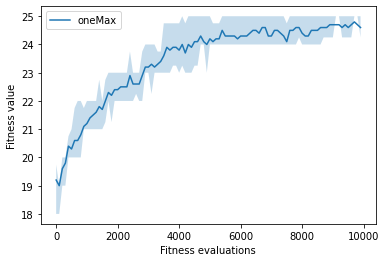

In [4]:
utils.plot_experiments(exp_ids=[experiment_id], stat_type="fitness")

## Alternate
We need to come up with some measure, how much the genome alternates between 0s and 1s

In [5]:
def alternateFitnes(ind):
    changes = 0
    for i in range(len(ind)-1):
        if ind[i] != ind[i + 1]:
            changes += 1
    return changes

Execute EA and plot the result rightaway

In [6]:
for i in range(n_experiments):
    logger = utils.Log(exp_id = "alternate", run_id = i, print_frequency = 10)
    evolutionary_algorithm(alternateFitnes, alternateFitnes, logger)


     900    10.00    15.66    22.00
    1900     8.00    16.40    24.00
    2900    10.00    17.07    22.00
    3900     9.00    18.13    22.00
    4900    13.00    19.53    23.00
    5900    14.00    20.14    23.00
    6900    16.00    20.89    24.00
    7900    15.00    20.63    23.00
    8900    15.00    20.50    23.00
    9900    13.00    20.62    23.00
     900     9.00    15.62    20.00
    1900    10.00    17.61    22.00
    2900    10.00    17.26    22.00
    3900    13.00    18.52    22.00
    4900    13.00    19.61    22.00
    5900    13.00    19.97    22.00
    6900    14.00    20.52    23.00
    7900    12.00    20.31    23.00
    8900    14.00    20.07    23.00
    9900    16.00    20.71    23.00
     900     9.00    16.29    22.00
    1900    12.00    17.76    22.00
    2900    12.00    17.29    20.00
    3900     9.00    17.84    22.00
    4900    11.00    18.20    23.00
    5900    10.00    18.52    23.00
    6900    13.00    18.43    22.00
    7900    12.00    19.92  

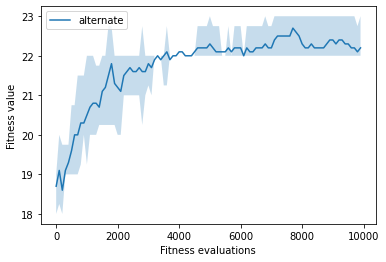

In [7]:
utils.plot_experiments(exp_ids=["alternate"], stat_type="fitness")

It looks like finding alternating strings is somewhat harder then "all ones".
Let's try more generations

In [8]:
for i in range(n_experiments):
    logger = utils.Log(exp_id = "alternate2", run_id = i, print_frequency = 10)
    evolutionary_algorithm(alternateFitnes, alternateFitnes, logger, generations=1000)


0    21.25    23.00
   45900    11.00    21.27    24.00
   46900    13.00    21.16    23.00
   47900    13.00    21.26    24.00
   48900    13.00    20.82    23.00
   49900    11.00    20.48    23.00
   50900    13.00    20.96    23.00
   51900    13.00    20.64    24.00
   52900    15.00    21.08    23.00
   53900    17.00    21.82    23.00
   54900    13.00    21.44    23.00
   55900    15.00    21.46    24.00
   56900    17.00    21.91    24.00
   57900    16.00    21.71    23.00
   58900    15.00    22.13    24.00
   59900    16.00    21.51    24.00
   60900    15.00    20.87    24.00
   61900    15.00    20.65    24.00
   62900    17.00    21.37    24.00
   63900    13.00    20.58    24.00
   64900    12.00    21.45    24.00
   65900    17.00    21.73    24.00
   66900    14.00    22.08    24.00
   67900    14.00    21.46    24.00
   68900    14.00    21.89    24.00
   69900    14.00    21.30    24.00
   70900    13.00    22.72    24.00
   71900    18.00    22.62    24.00
   72900

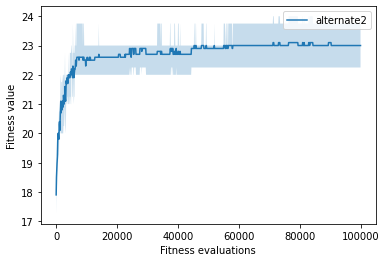

In [9]:
utils.plot_experiments(exp_ids=["alternate2"], stat_type="fitness")

Hmm...even more generations don't guarantee finding the optimal solution
Let's make the roulette distribution sharper

In [10]:
def sharp_fitness(p):
    return alternateFitnes(p)**3

for i in range(n_experiments):
    logger = utils.Log(exp_id = "alternate3", run_id = i, print_frequency = 10)
    evolutionary_algorithm(sharp_fitness, alternateFitnes, logger, generations=100)
    


     900    12.00    17.35    20.00
    1900     9.00    19.02    22.00
    2900    16.00    20.78    23.00
    3900    14.00    20.58    22.00
    4900    17.00    21.43    22.00
    5900    14.00    21.28    22.00
    6900    14.00    21.55    23.00
    7900    14.00    21.88    23.00
    8900    16.00    22.08    23.00
    9900    15.00    22.18    23.00
     900    14.00    18.21    22.00
    1900    14.00    20.71    23.00
    2900    14.00    22.04    23.00
    3900    17.00    22.48    23.00
    4900    17.00    22.51    23.00
    5900    16.00    22.24    23.00
    6900    17.00    22.76    23.00
    7900    16.00    22.26    23.00
    8900    15.00    22.63    23.00
    9900    19.00    22.86    23.00
     900    13.00    17.82    22.00
    1900    14.00    19.96    22.00
    2900    15.00    21.46    24.00
    3900    17.00    21.60    24.00
    4900    15.00    23.01    24.00
    5900    18.00    23.62    24.00
    6900    20.00    23.73    24.00
    7900    16.00    23.50  

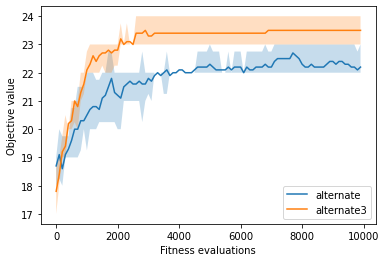

In [11]:
utils.plot_experiments(exp_ids=["alternate","alternate3"], stat_type="objective")

Sharper distribution is working much better :)

## Grid Search

Let's try bunch of different values of Mutation and Crossover probabilities

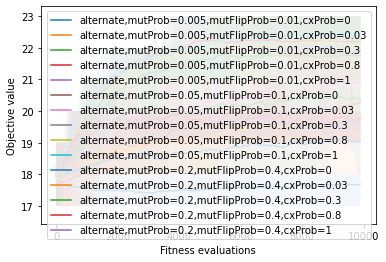

In [26]:
all_experiments = []

for mut_prob, mut_flip_prob in (0.005, 0.01), (0.05, 0.1), (0.2, 0.4):
    for crossover_prob in (0, 0.03, 0.3, 0.8, 1):
        params_str = f"mutProb={mut_prob},mutFlipProb={mut_flip_prob},cxProb={crossover_prob}"
        experiment_name = f"alternate,{params_str}"
        all_experiments.append(experiment_name)

        for i in range(100):    
            logger = utils.Log(exp_id = experiment_name, run_id = i, print_frequency = 100000)
            evolutionary_algorithm(alternateFitnes, alternateFitnes, logger, generations=100, mut_prob = mut_prob, mut_flip_prob = mut_flip_prob, cx_prob = crossover_prob)

utils.plot_experiments(exp_ids=all_experiments, stat_type="objective")



It seems like the optimal parameter values are around mutProb = 0.05, mutFlipProb=0.1, cxProb = 1